In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def visualize_numerical(filename, title):
    # Provided data
    data = pd.read_csv(filename).values
    # Column names for clarity in plotting
    columns = ['Test_Case', 'RMSE_Mean', 'RMSE_Max', 'MAE_Mean', 'MAE_Max', 'Computation_Time']

    # Plotting
    fig, axs = plt.subplots(3, 2, figsize=(12, 10))  # Adjusted size for clarity
    fig.suptitle(title)

    # Mapping column names to indices for readability
    col_index = {name: i for i, name in enumerate(columns)}

    # Subplot for RMSE Mean
    axs[0, 0].plot(data[:, col_index['Test_Case']], data[:, col_index['RMSE_Mean']], marker='o')
    axs[0, 0].set_title('RMSE Mean')
    axs[0, 0].set_xlabel('Test Case')
    axs[0, 0].set_ylabel('RMSE Mean')

    # Subplot for RMSE Max
    axs[0, 1].plot(data[:, col_index['Test_Case']], data[:, col_index['RMSE_Max']], marker='o', color='red')
    axs[0, 1].set_title('RMSE Max')
    axs[0, 1].set_xlabel('Test Case')
    axs[0, 1].set_ylabel('RMSE Max')

    # Subplot for MAE Mean
    axs[1, 0].plot(data[:, col_index['Test_Case']], data[:, col_index['MAE_Mean']], marker='o', color='green')
    axs[1, 0].set_title('MAE Mean')
    axs[1, 0].set_xlabel('Test Case')
    axs[1, 0].set_ylabel('MAE Mean')

    # Subplot for MAE Max
    axs[1, 1].plot(data[:, col_index['Test_Case']], data[:, col_index['MAE_Max']], marker='o', color='purple')
    axs[1, 1].set_title('MAE Max')
    axs[1, 1].set_xlabel('Test Case')
    axs[1, 1].set_ylabel('MAE Max')

    # Subplot for Computation Time
    axs[2, 0].plot(data[:, col_index['Test_Case']], data[:, col_index['Computation_Time']], marker='o', color='orange')
    axs[2, 0].set_title('Computation Time')
    axs[2, 0].set_xlabel('Test Case')
    axs[2, 0].set_ylabel('Time (Seconds)')

    # Adjust layout to prevent overlap of subplots
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plot
    plt.show()

def visualize_categorical(filename, title):
    # Data preparation
    version_df = pd.read_csv(filename).values

    data = {
        'Configuration': version_df[:, 0].tolist(),  # Extracts all rows of the first column
        'RMSE_Mean': version_df[:, 1].astype(float).tolist(),  # Convert to float and then to list
        'RMSE_Max': version_df[:, 2].astype(float).tolist(),
        'MAE_Mean': version_df[:, 3].astype(float).tolist(),
        'MAE_Max': version_df[:, 4].astype(float).tolist(),
        'Time': version_df[:, 5].astype(float).tolist()
    }

    version_df = pd.DataFrame(data)

    # Set up the matplotlib figure
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))  # Adjust the size as needed
    axs = axs.flatten()  # Flatten the array of axes for easier iteration
    fig.suptitle(title)

    # Plot each metric
    metrics = ['RMSE_Mean', 'RMSE_Max', 'MAE_Mean', 'MAE_Max', 'Time']
    colors = ['skyblue', 'orange', 'lightgreen', 'red', 'purple']  # Different color for each plot

    for ax, metric, color in zip(axs, metrics, colors):
        version_df.plot(kind='bar', x='Configuration', y=metric, ax=ax, color=color, legend=False)
        ax.set_title(metric)
        ax.set_xlabel('Configuration')
        ax.set_ylabel(metric)

    # Remove empty subplots if there are any
    for i in range(len(metrics), len(axs)):
        fig.delaxes(axs[i])

    fig.tight_layout(pad=3.0)  # Adjust spacing between plots
    plt.show()



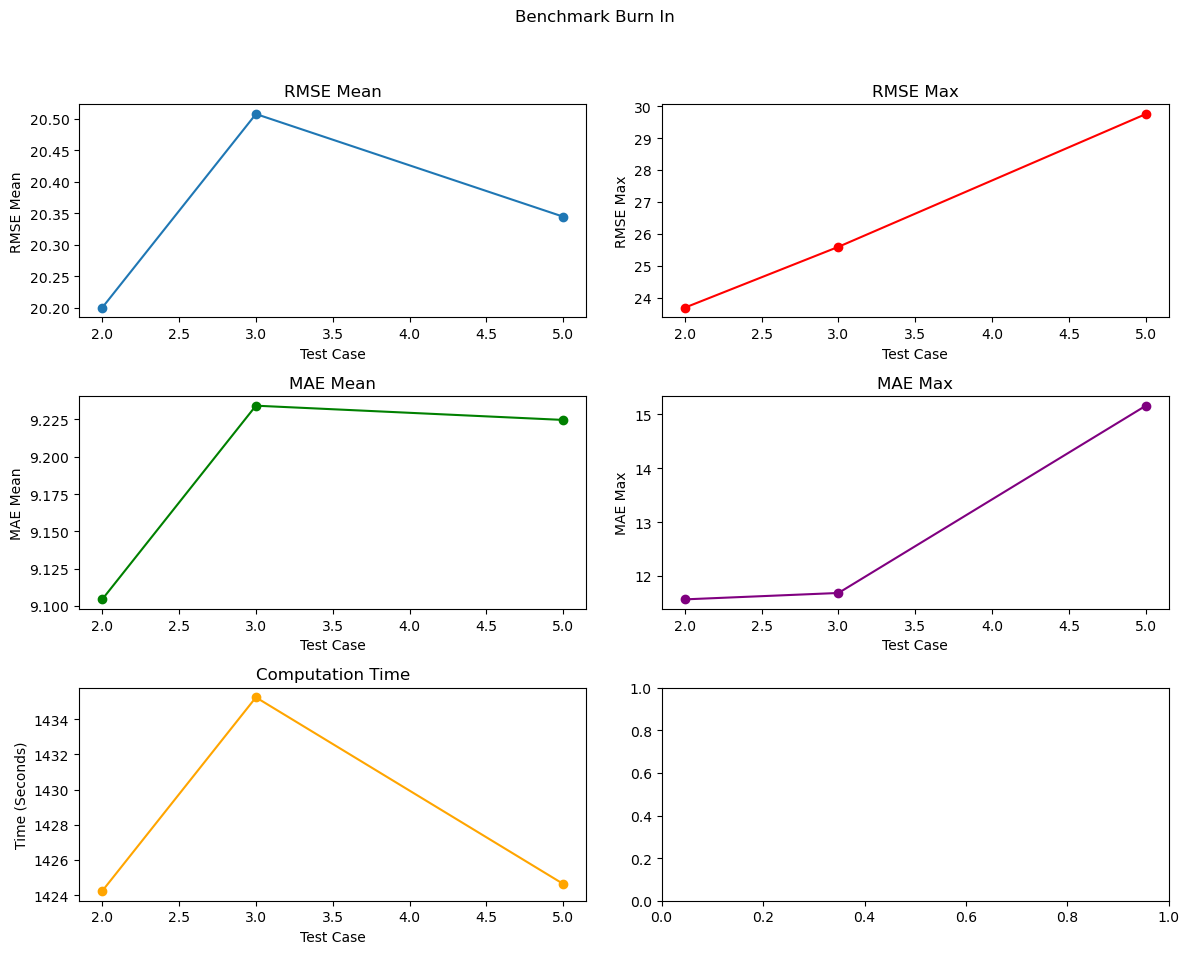

In [3]:
visualize_numerical('burnin.txt', 'Benchmark Burn In')

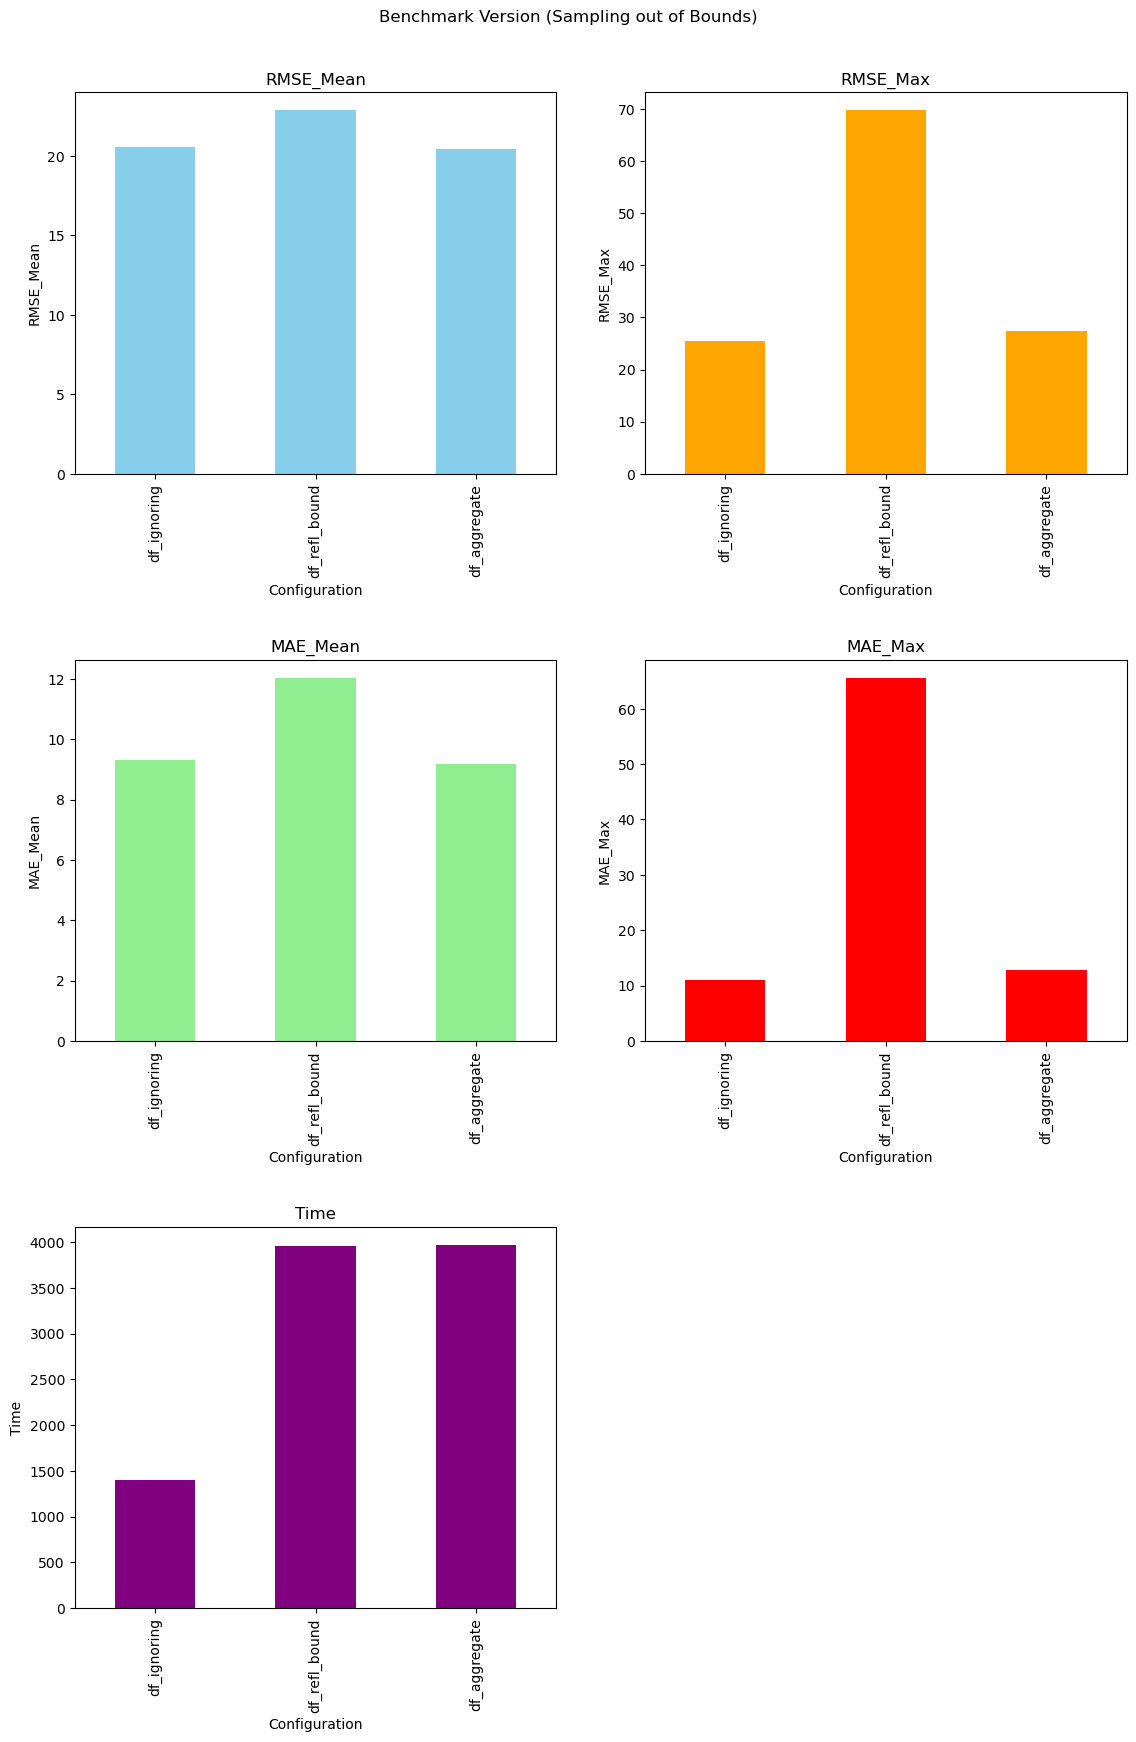

In [4]:
visualize_categorical('version.txt', 'Benchmark Version (Sampling out of Bounds)')

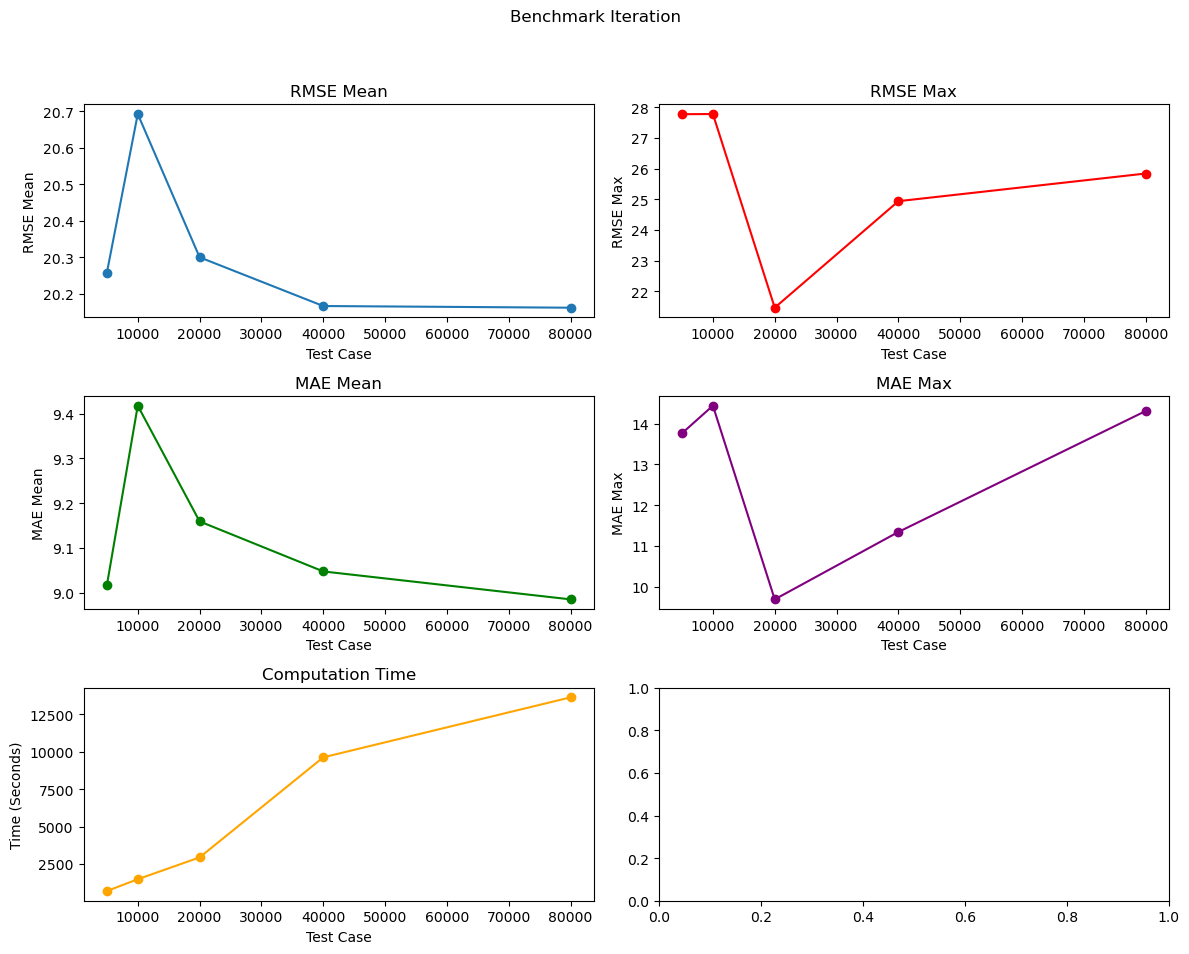

In [5]:
visualize_numerical('iteration.txt', 'Benchmark Iteration')

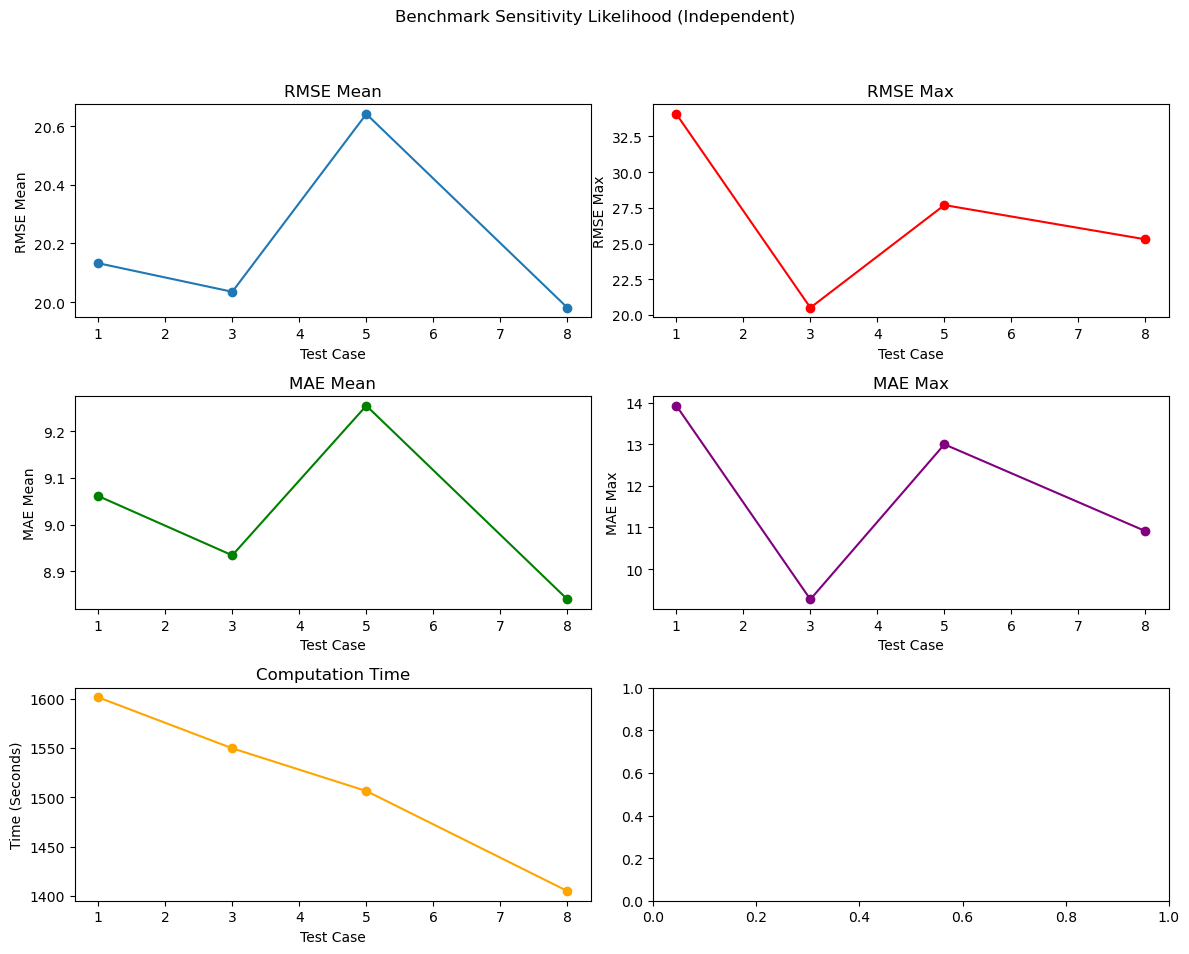

In [6]:
visualize_numerical('sensitivity_likelihood_independent.txt', 'Benchmark Sensitivity Likelihood (Independent)')

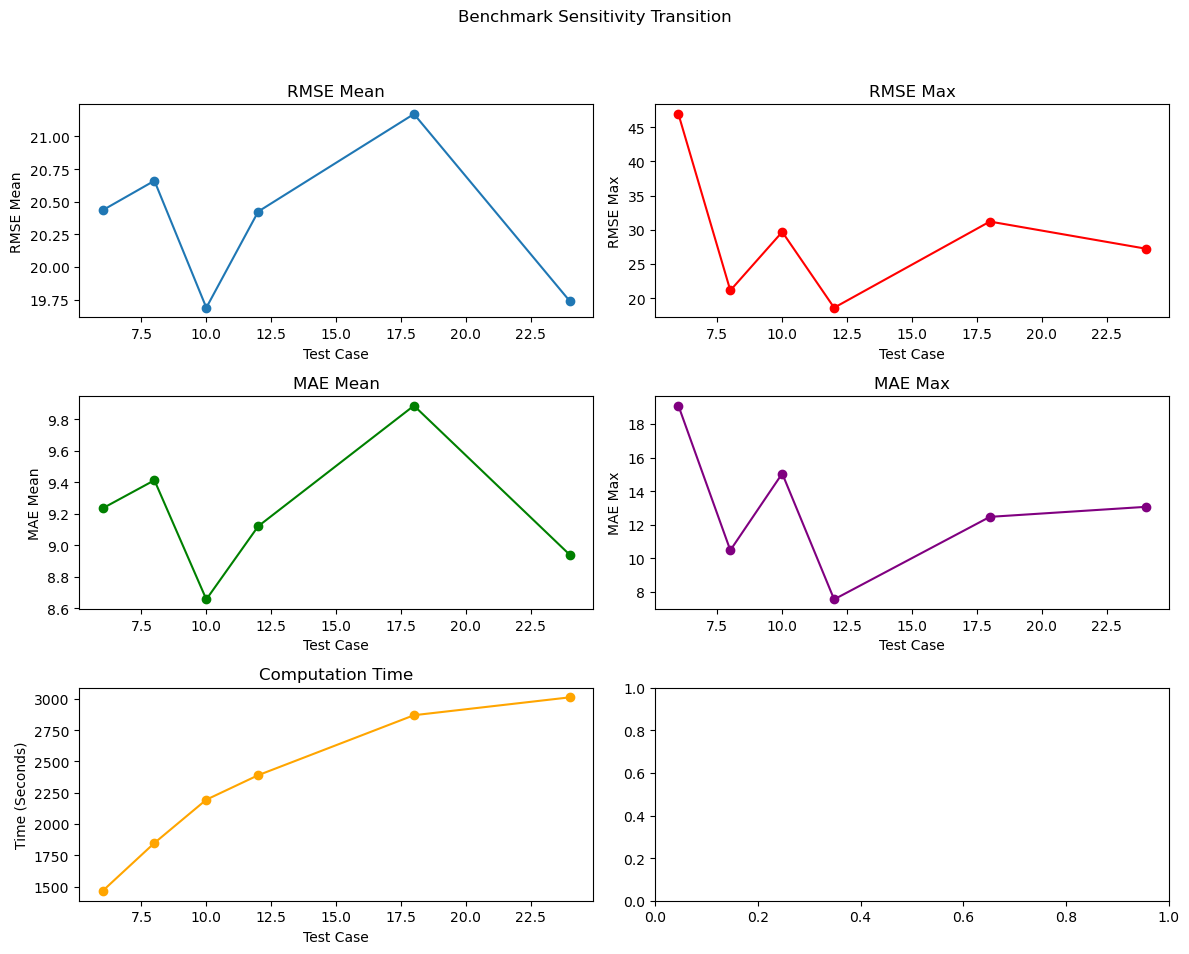

In [7]:
visualize_numerical('sensitivity_transition.txt', 'Benchmark Sensitivity Transition')

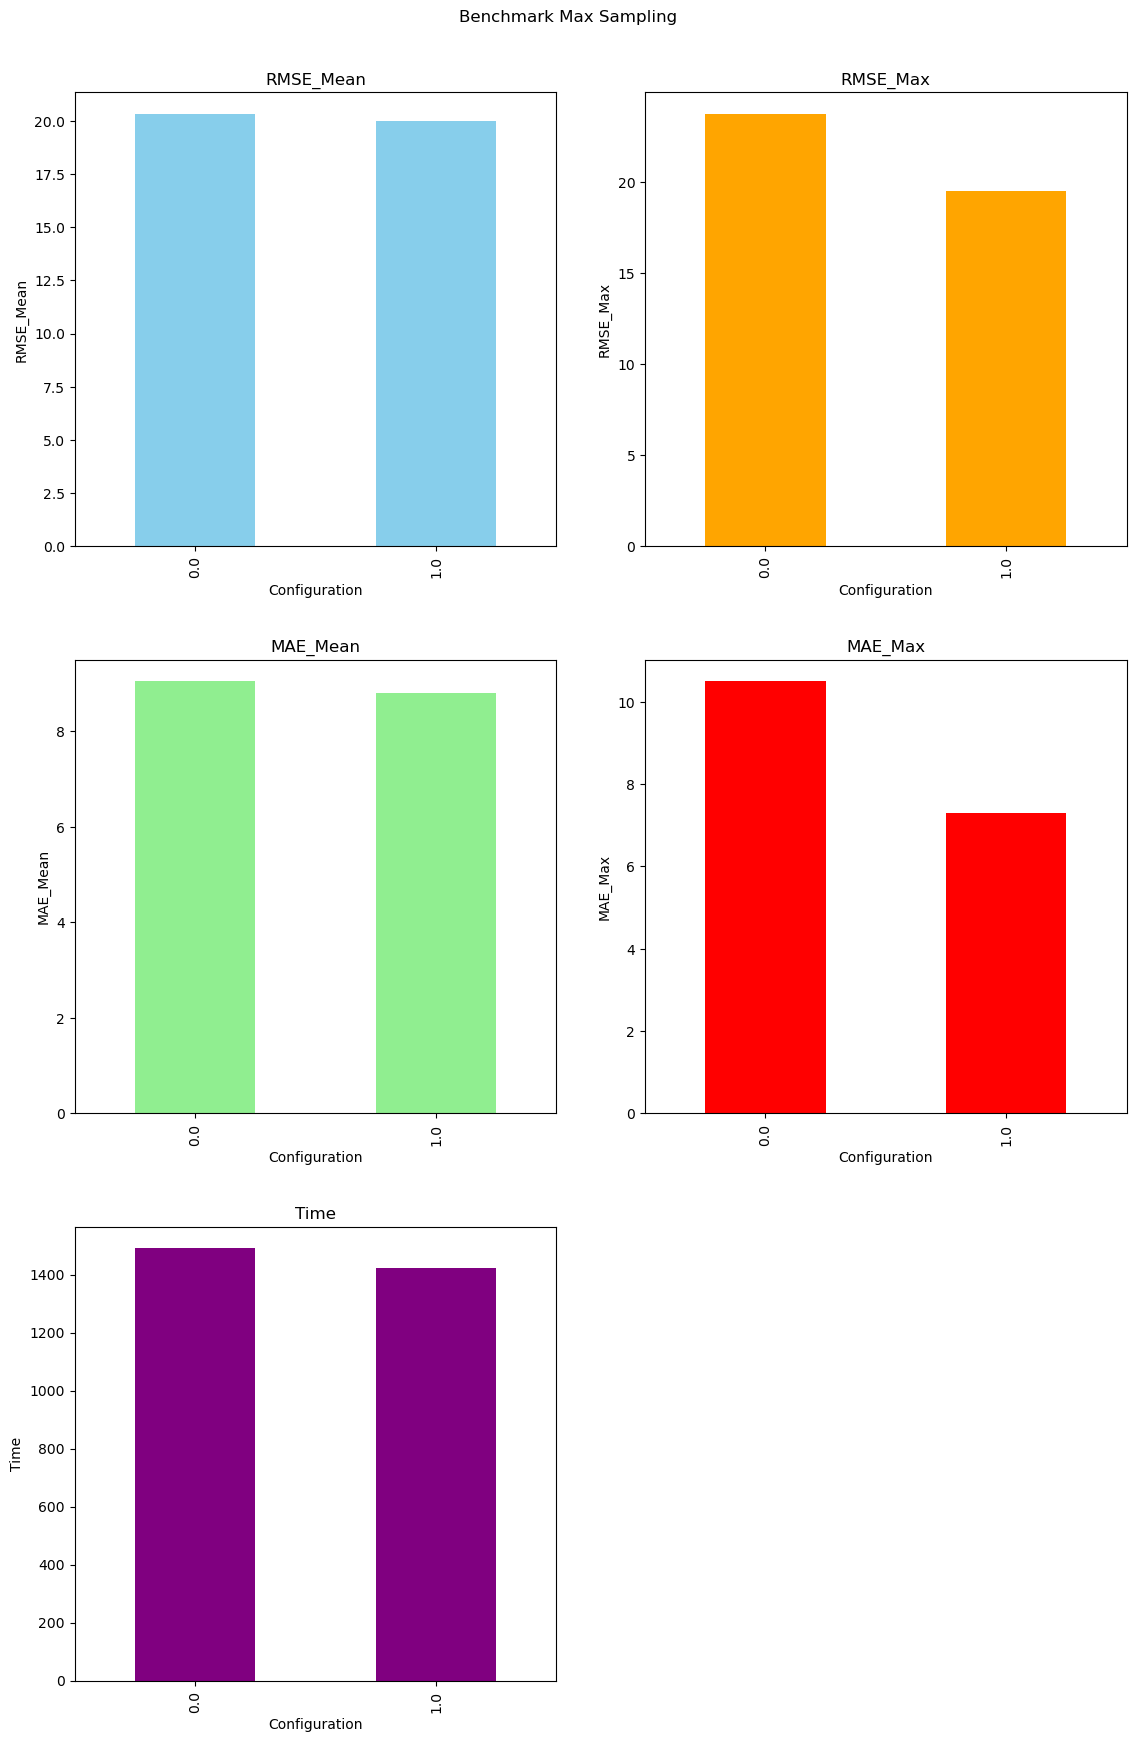

In [8]:
visualize_categorical('max_sampling.txt', 'Benchmark Max Sampling')

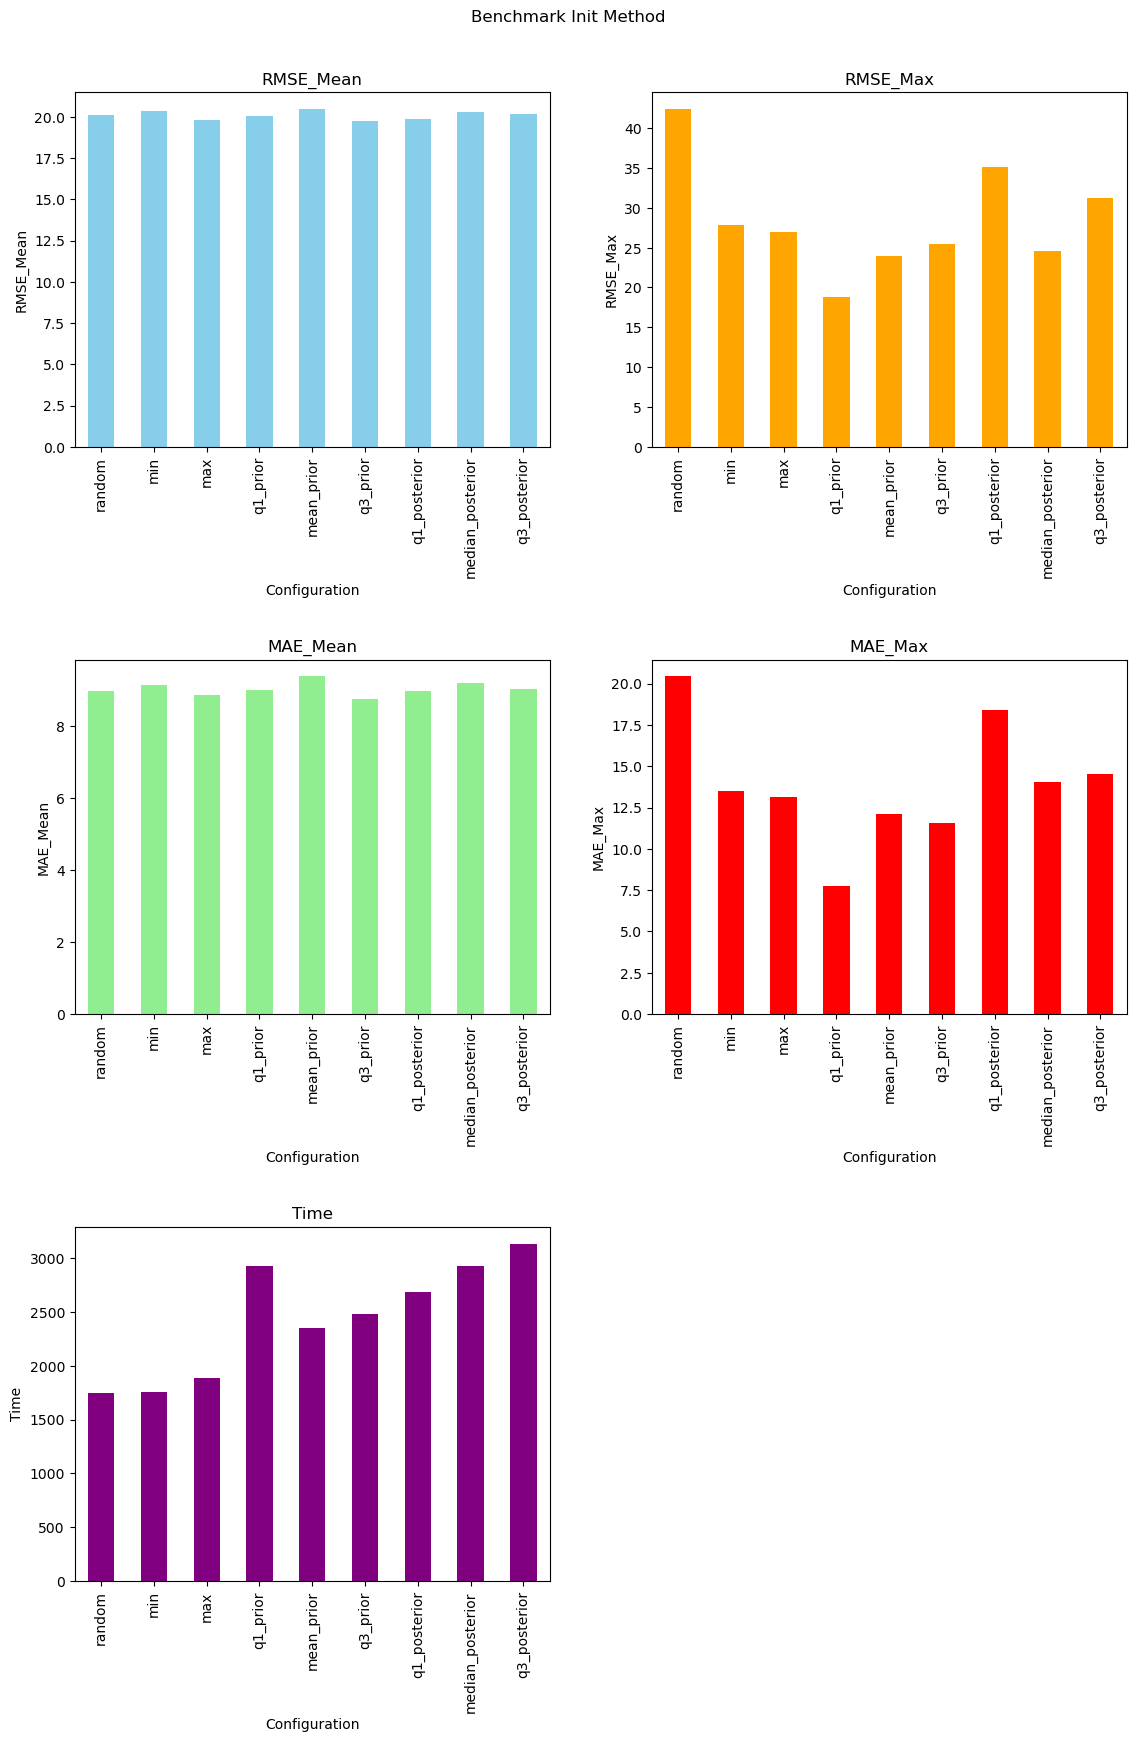

In [9]:
visualize_categorical('init_method.txt', 'Benchmark Init Method')